<a href="https://colab.research.google.com/github/nyamskamau/Autolib_Dataset_Week4_DSC_6-/blob/main/Roselynn_Kamau_Week_4_DSC_Autolib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assesment

To work on this project, we will perform the following analysis with Python:

* Find and deal with outliers, anomalies, and missing data within the dataset.
* Plot appropriate univariate and bivariate summaries recording our observations.
* Implement the solution by performing hypothesis testing.
 



# 1.Data Preparation and Cleaning

## 1.1 Loading the Dataset

We first load the Dataset along with the column descriptions into the Notebook.

We then access information regarding the columns within the Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Autolib.csv')
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
descriptions = pd.read_excel('Definitions.xlsx')
descriptions

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


## 1.2. Data Cleaning

With the Information we have at hand we can carry out the data cleaning process. 

Moving stepwise to ensure we have thoroughly combed through the dataset.

### 1.2.1 Validity

Checking the validity of our Dataset means checking that all the given columns are useful in the Analysis.

The Dataset has 13 columns which are all necessary in the analysis therefore we proceed to the next step


### 1.2.2. Accuracy

Checking the accuracy involves checking that the columns given are all correct.

For instance in the Day Of Week column , the values should range from zero to six.

Any value larger tham six is innaccurate and should be dropped.

In [ ]:
df.dayOfWeek.unique()

array([0, 1, 2, 3, 4, 5, 6])

### 1.2.3. Completeness

We then scrutinize the Dataset for null values.

These entries ,if present, should be dropped from the Dataset

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.shape

(16085, 13)

### 1.2.4. Consistency

We then investigate whether there are duplicated entries.

These should be dropped as they would distort the results of the analysis.

In [ ]:
df.duplicated().sum()

0

### 1.2.5. Uniformity

We check that the columns in the dataset are of the correct Data type. 

We also rename columns where necessary in order to ensure that they relate to the variables we are investigating.

In [ ]:
df.rename(columns={'dayOfWeek':"Day_of_Week",
                   'date':'Date',
                   'n_daily_data_points':'Daily_data_Points',
                   'day_type':'Day_type'},inplace=True)

# 2.Exploratory Data Analysis

## 2.1. Univariate Analysis

We carried out Univariate analysis on the columns of the Dataset.

The dataset we had had several columns with discrete variables.

#### 2.1.1.BlueCars

In [ ]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].describe()

,BlueCars_taken_sum,BlueCars_returned_sum
count,16085.000000,16085.000000
mean,125.926951,125.912714
std,185.426579,185.501535
min,0.000000,0.000000
25%,20.000000,20.000000
50%,46.000000,46.000000
75%,135.000000,135.000000
max,1352.000000,1332.000000


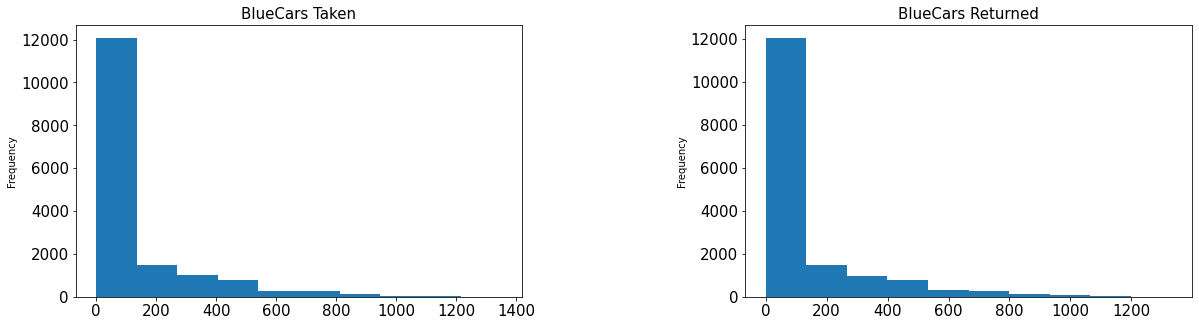

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
df['BlueCars_taken_sum'].plot(kind='hist', ax=axarr[0], fontsize=15).set_title("BlueCars Taken", fontsize=15)
df['BlueCars_returned_sum'].plot( kind='hist',ax=axarr[1], fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)


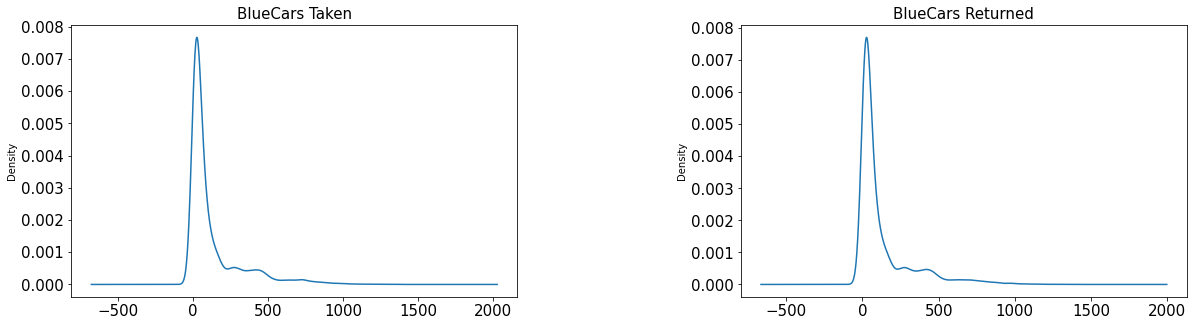

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
df['BlueCars_taken_sum'].plot(kind='density', ax=ax1, fontsize=15).set_title("BlueCars Taken", fontsize=15)
df['BlueCars_returned_sum'].plot( kind='density',ax=ax2, fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)

In [ ]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].skew()

BlueCars_taken_sum       2.406355
BlueCars_returned_sum    2.412085
dtype: float64

In [ ]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].kurt()

BlueCars_taken_sum       6.172692
BlueCars_returned_sum    6.186288
dtype: float64

**Summary**

The BlueCars columns were both very highly skewed with the Blue_Cars returned having a skewness of 2.41
and the taken having a skew of 2.4.

Furthermore they both had very heavy tails with a kurtosis value of 6.18 and 6.17 for the Returned and Taken columns respectively.

This could tentatively say that the outliers in the dataset were the source of these anomalies but that it is still subject to further scrutiny.

#### 2.1.2.Utilib 

In [ ]:
df[['Utilib_taken_sum','Utilib_returned_sum']].describe()

,Utilib_taken_sum,Utilib_returned_sum
count,16085.000000,16085.000000
mean,3.698290,3.699099
std,5.815058,5.824634
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,4.000000,4.000000
max,54.000000,58.000000


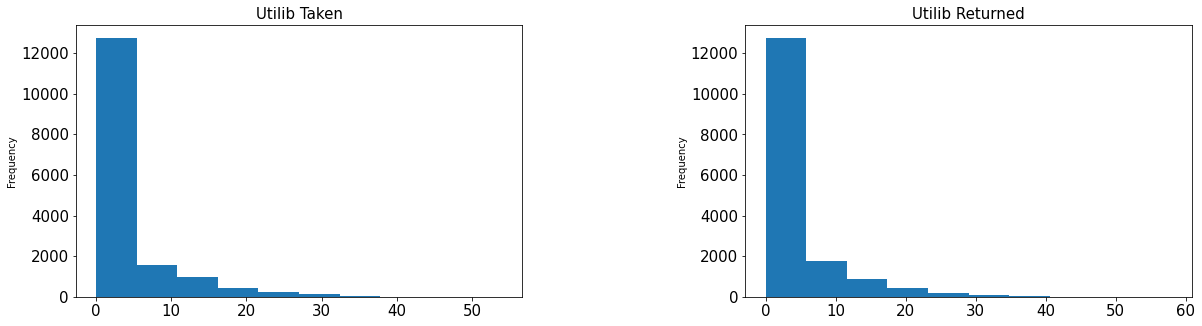

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
df['Utilib_taken_sum'].plot(kind='hist', ax=axarr[0], fontsize=15).set_title("Utilib Taken", fontsize=15)
df['Utilib_returned_sum'].plot( kind='hist',ax=axarr[1], fontsize=15 ).set_title("Utilib Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)


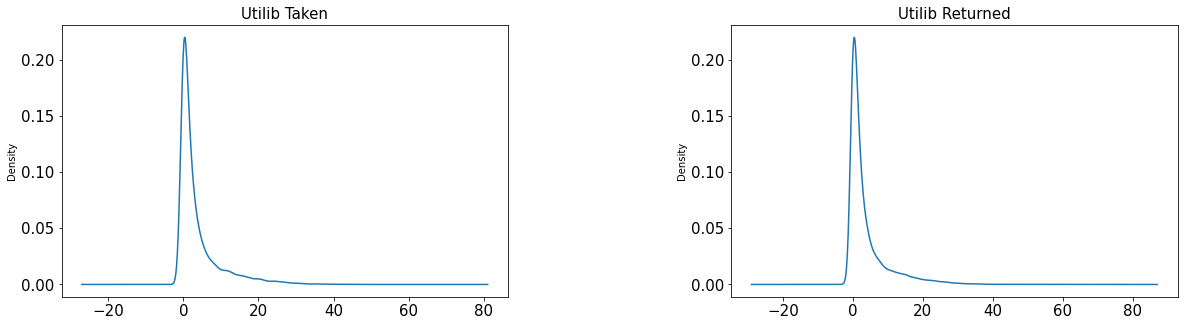

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
df['Utilib_taken_sum'].plot(kind='density', ax=axarr[0], fontsize=15).set_title("Utilib Taken", fontsize=15)
df['Utilib_returned_sum'].plot( kind='density',ax=axarr[1], fontsize=15 ).set_title("Utilib Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)


In [ ]:
df[['Utilib_taken_sum','Utilib_returned_sum']].skew()

Utilib_taken_sum       2.556872
Utilib_returned_sum    2.578665
dtype: float64

In [ ]:
df[['Utilib_returned_sum','Utilib_returned_sum']].kurt()

Utilib_returned_sum    7.936357
Utilib_returned_sum    7.936357
dtype: float64

**Summary**

Similar to the BlueCars columns the Utilib columns were both highly skewed and very Leptokurtic.

They had an approximate skew of 2.56 and a kurtosis value of 7.9 , meaning they also had heavy tails.


#### 2.1.3.Utilib 14

In [ ]:
df[['Utilib_14_taken_sum','Utilib_14_returned_sum']].describe()

,Utilib_14_taken_sum,Utilib_14_returned_sum
count,16085.000000,16085.000000
mean,8.600560,8.599192
std,12.870098,12.868993
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,10.000000,10.000000
max,100.000000,101.000000


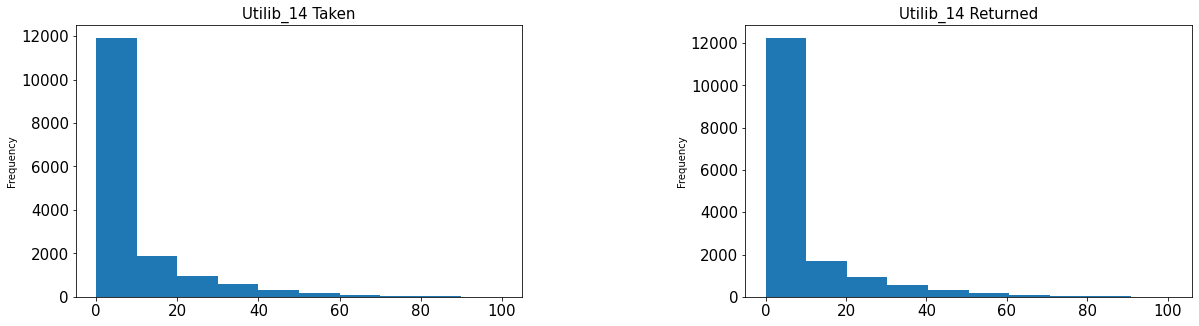

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
df['Utilib_14_taken_sum'].plot(kind='hist', ax=axarr[0], fontsize=15).set_title("Utilib_14 Taken", fontsize=15)
df['Utilib_14_returned_sum'].plot( kind='hist',ax=axarr[1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)


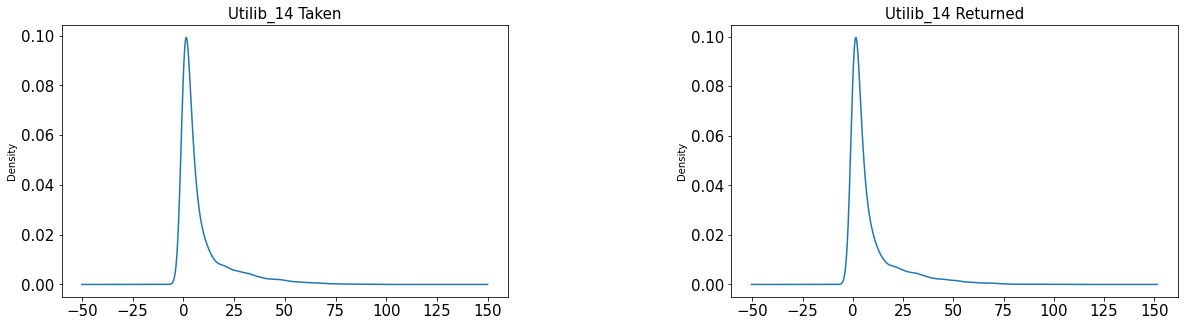

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
df['Utilib_14_taken_sum'].plot(kind='density', ax=axarr[0], fontsize=15).set_title("Utilib_14 Taken", fontsize=15)
df['Utilib_14_returned_sum'].plot( kind='density',ax=axarr[1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)


In [ ]:
df[['Utilib_14_taken_sum','Utilib_14_returned_sum']].skew()

Utilib_14_taken_sum       2.510924
Utilib_14_returned_sum    2.511488
dtype: float64

In [ ]:
df[['Utilib_14_taken_sum','Utilib_14_returned_sum']].kurt()

Utilib_14_taken_sum       7.186815
Utilib_14_returned_sum    7.185463
dtype: float64

The Utilib_14 columns also had similar attributes to the BlueCars and Utilib Columns.

They both were extremely skewed and highly Leptokurtic.


#### 2.1.4.Removing the outliers in the Dataset

This is a very important step especially in this analysis.

We have observed that the columns we would eventually like to investigate have heavy tails and therefore they violate the assumption of normality required to carry out hypothesis testing.

We therefore have to drop all the outliers from the dataset.

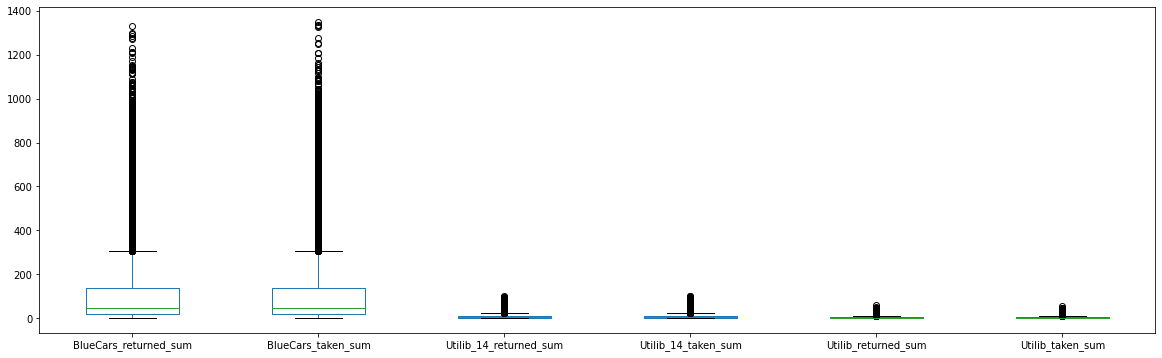

In [ ]:
df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].plot(kind='box',figsize=(20,6))

In [ ]:
Q1 = df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].quantile(0.25)
Q3 = df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].quantile(0.75)
IQR = Q3 - Q1
IQR
((df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]<(Q1 - 1.5*IQR))|(df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]>(Q3 + 1.5 *IQR))).value_counts()
df = df[~((df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]<(Q1 - 1.5*IQR))|(df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]>(Q3 + 1.5 *IQR))).any(axis=1)]

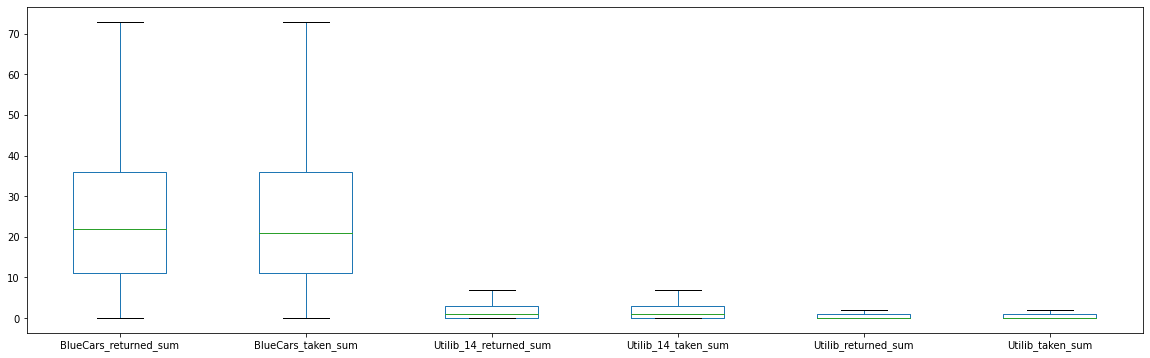

In [ ]:
df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].plot(kind='box',figsize=(20,6))

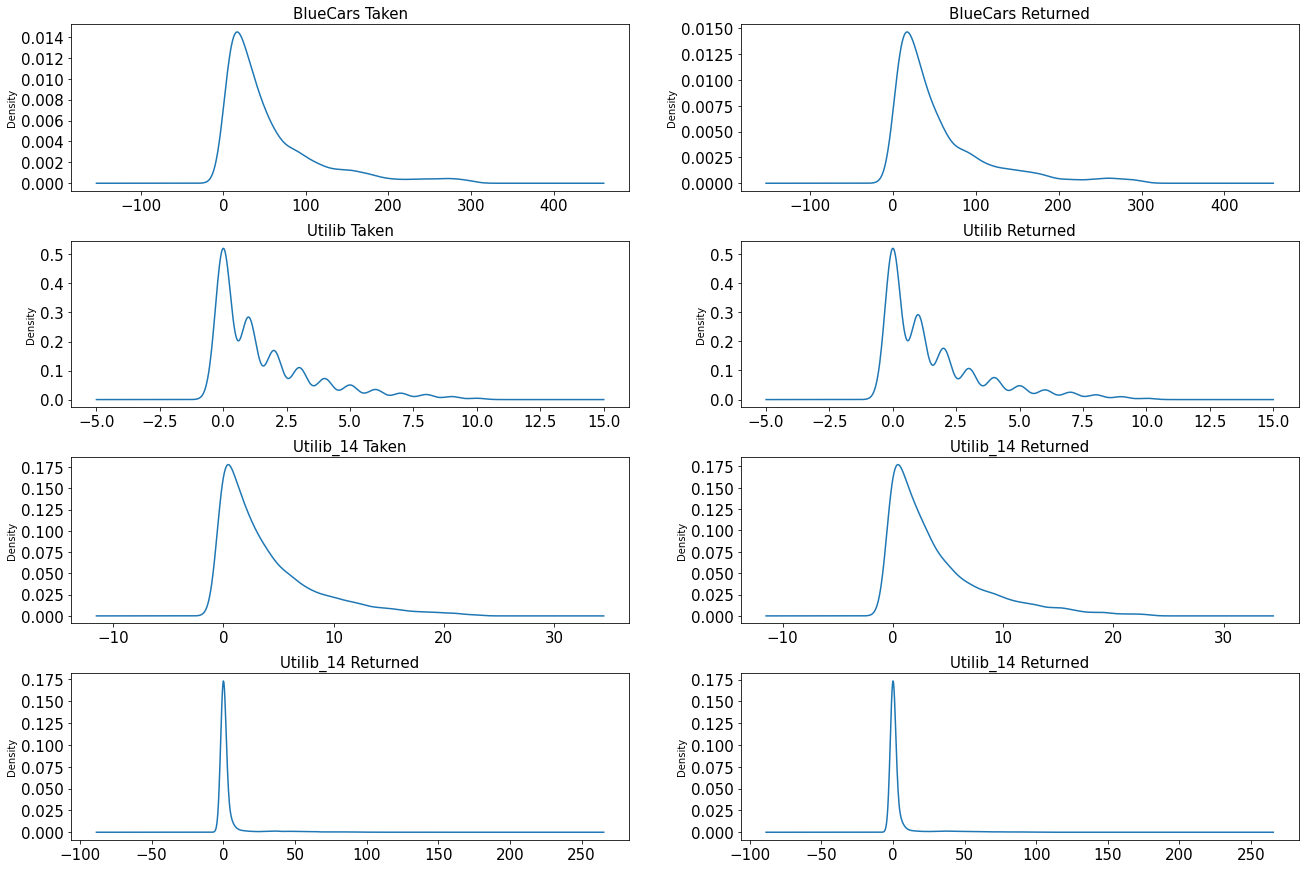

In [ ]:
fig, axarr = plt.subplots(4, 2, figsize=(22, 15))
df['BlueCars_taken_sum'].plot(kind='density', ax=axarr[0][0], fontsize=15).set_title("BlueCars Taken", fontsize=15)
df['BlueCars_returned_sum'].plot( kind='density',ax=axarr[0][1], fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
df['Utilib_taken_sum'].plot( kind='density',ax=axarr[1][0], fontsize=15 ).set_title("Utilib Taken", fontsize=15) 
df['Utilib_returned_sum'].plot( kind='density',ax=axarr[1][1], fontsize=15 ).set_title("Utilib Returned", fontsize=15) 
df['Utilib_14_taken_sum'].plot( kind='density',ax=axarr[2][0], fontsize=15 ).set_title("Utilib_14 Taken", fontsize=15) 
df['Utilib_14_returned_sum'].plot( kind='density',ax=axarr[2][1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
df['Slots_freed_sum'].plot( kind='density',ax=axarr[3][0], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
df['Slots_taken_sum'].plot( kind='density',ax=axarr[3][1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 




plt.subplots_adjust(hspace=.3) 

In [ ]:
df.shape

(13454, 13)

**Summary**

After removing all the outliers in the Dataset we are left wth approximately 8,200 entries.

This is a highly unusual situation given that the Dataset had over 16,000 entries,meaning almost half the data was made up of outliers.

Even after removing the outliers from the dataset it can still be seen that the data has prolonged tails, an indication that it does not follow a normal distribution.

The cause of this anomaly should be ivestigated as this makes the quality of the data extremely poor and makes any inferences made from the data rather biased.

#### 2.1.5.Day Type

In [ ]:
df.Day_type.describe()

count       13454
unique          2
top       weekday
freq         9787
Name: Day_type, dtype: object

In [ ]:
df.Day_type.value_counts()

weekday    9787
weekend    3667
Name: Day_type, dtype: int64

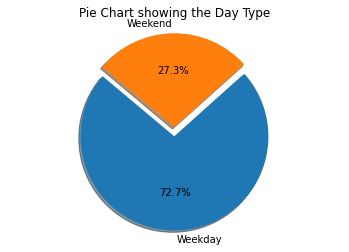

In [ ]:
labels = ['Weekday','Weekend']
plt.pie(df['Day_type'].value_counts() ,labels=labels,autopct = '%1.1f%%', explode=(0.1,0),shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing the Day Type')
plt.show()

**Summary**

It can be seen that there is more activity in the stations an weekdays as opposed to Weekends.

This is probably because more days out of the week are accounted for as Weekdays.

#### 2.1.6.Day Of Week

In [ ]:
df.Day_of_Week.value_counts()

0    2027
1    2018
3    1922
2    1914
4    1906
6    1847
5    1820
Name: Day_of_Week, dtype: int64

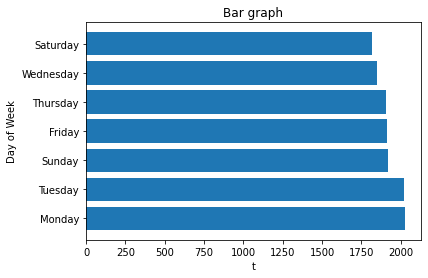

In [ ]:
labels=['Monday','Tuesday','Sunday','Friday','Thursday','Wednesday','Saturday']
plt.barh(labels , df['Day_of_Week'].value_counts())
plt.ylabel("Day of Week")
plt.xlabel("t")
plt.title("Bar graph")
plt.show()

**Summary**

It can be seen that there is almost the same amount of activity during all the days of the week with the busiest day being Mondays.

## 2.2.Bivariate Analysis

We decide to carry out Bivariate analysis of the Categorical Variables ie the Day Type and the Day of the Week with comparison to the numerical columns we have at hand.

#### 2.2.1.Day of the Week

In [ ]:

df['Day_of_Week']=df['Day_of_Week'].astype(str)
df['Day_of_Week'].replace({'0':'Monday','1':'Tuesday', '2':'Wednesday', '3':'Thursday','4':'Friday', '5':'Saturday','6':'Sunday'},inplace=True)


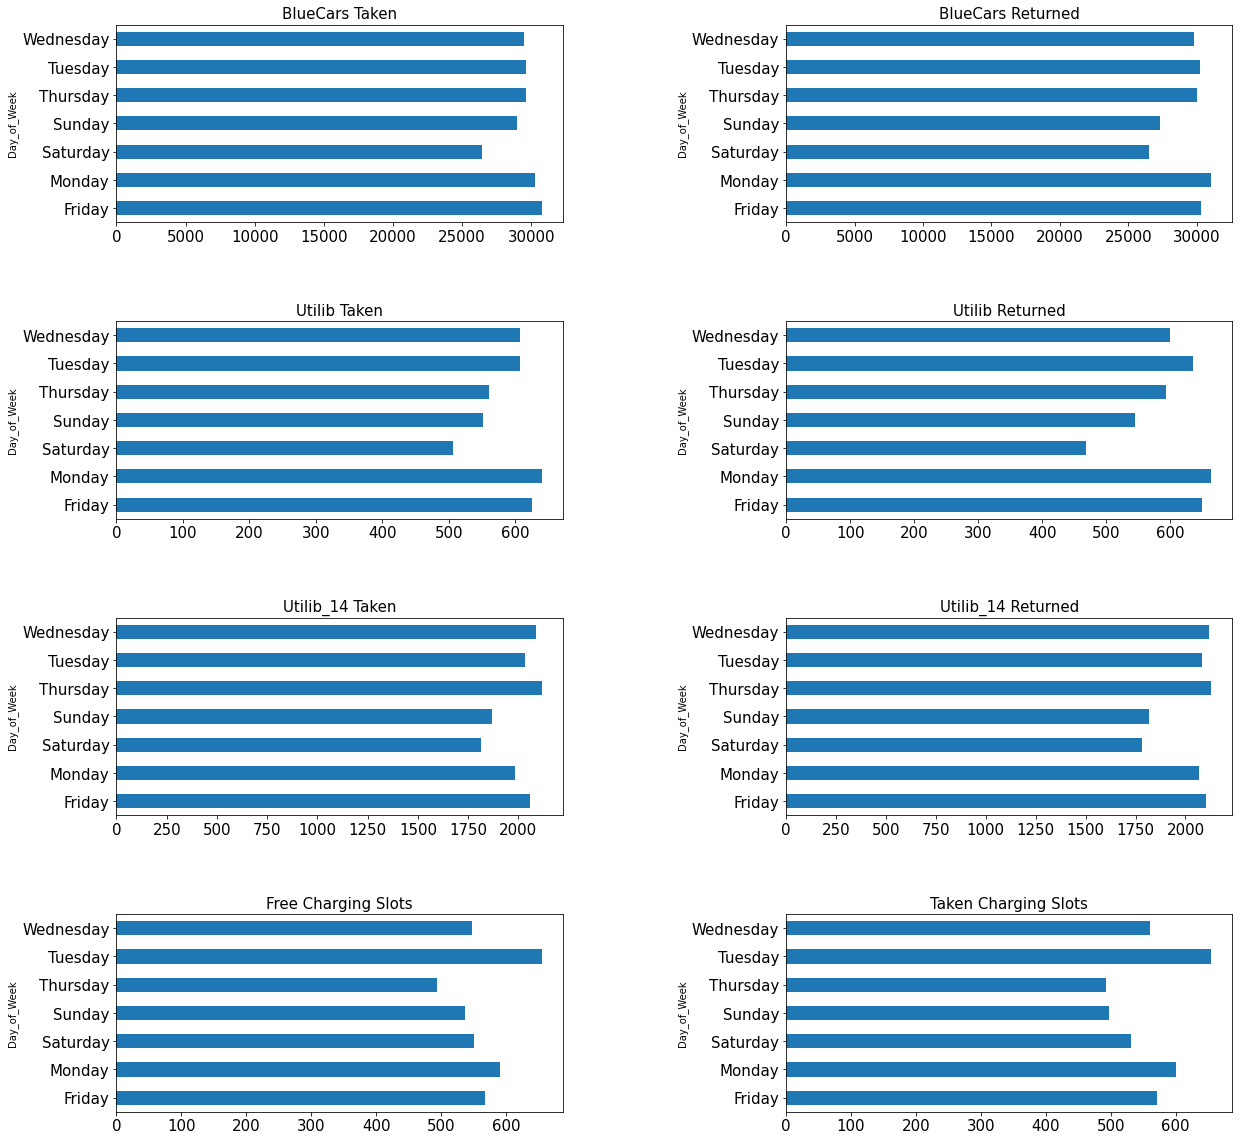

In [ ]:

fig, axarr = plt.subplots(4, 2, figsize=(20, 20))
df.groupby(['Day_of_Week'])['BlueCars_taken_sum'].sum().plot(kind='barh', ax=axarr[0][0],fontsize=15).set_title("BlueCars Taken", fontsize=15)
df.groupby(['Day_of_Week'])['BlueCars_returned_sum'].sum().plot( kind='barh',ax=axarr[0][1], fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
df.groupby(['Day_of_Week'])['Utilib_taken_sum'].sum().plot.barh(ax=axarr[1][0], fontsize=15 ).set_title("Utilib Taken", fontsize=15) 
df.groupby(['Day_of_Week'])['Utilib_returned_sum'].sum().plot( kind='barh',ax=axarr[1][1], fontsize=15 ).set_title("Utilib Returned", fontsize=15) 
df.groupby(['Day_of_Week'])['Utilib_14_taken_sum'].sum().plot( kind='barh',ax=axarr[2][0], fontsize=15 ).set_title("Utilib_14 Taken", fontsize=15) 
df.groupby(['Day_of_Week'])['Utilib_14_returned_sum'].sum().plot( kind='barh',ax=axarr[2][1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
df.groupby(['Day_of_Week'])['Slots_freed_sum'].sum().plot( kind='barh',ax=axarr[3][0], fontsize=15 ).set_title("Free Charging Slots", fontsize=15) 
df.groupby(['Day_of_Week'])['Slots_taken_sum'].sum().plot( kind='barh',ax=axarr[3][1], fontsize=15 ).set_title("Taken Charging Slots", fontsize=15) 


plt.subplots_adjust(wspace=.5,hspace=.5) 

**Summary**

It can be observed that:

* There is an almost equal amount of Blue Cars being picked and returned to various stations throughout the week with Saturday having the least number of cars being picked and Saturday and Sunday having the least number of cars being returned.
* Similarly Saturday and Sunday have the least number of Utilibs being picked and returned to the stations with Monday having the most pick ups and returns.
* As obsreved in the Utilibs the Utilibs_14 have the lowest number of returns and pick-ups throughout the week.
* Interestingly Tuesday has the highest amount of both Free and Occupied charging slots within the stations all through the week.

#### 2.2.2.Type of Day

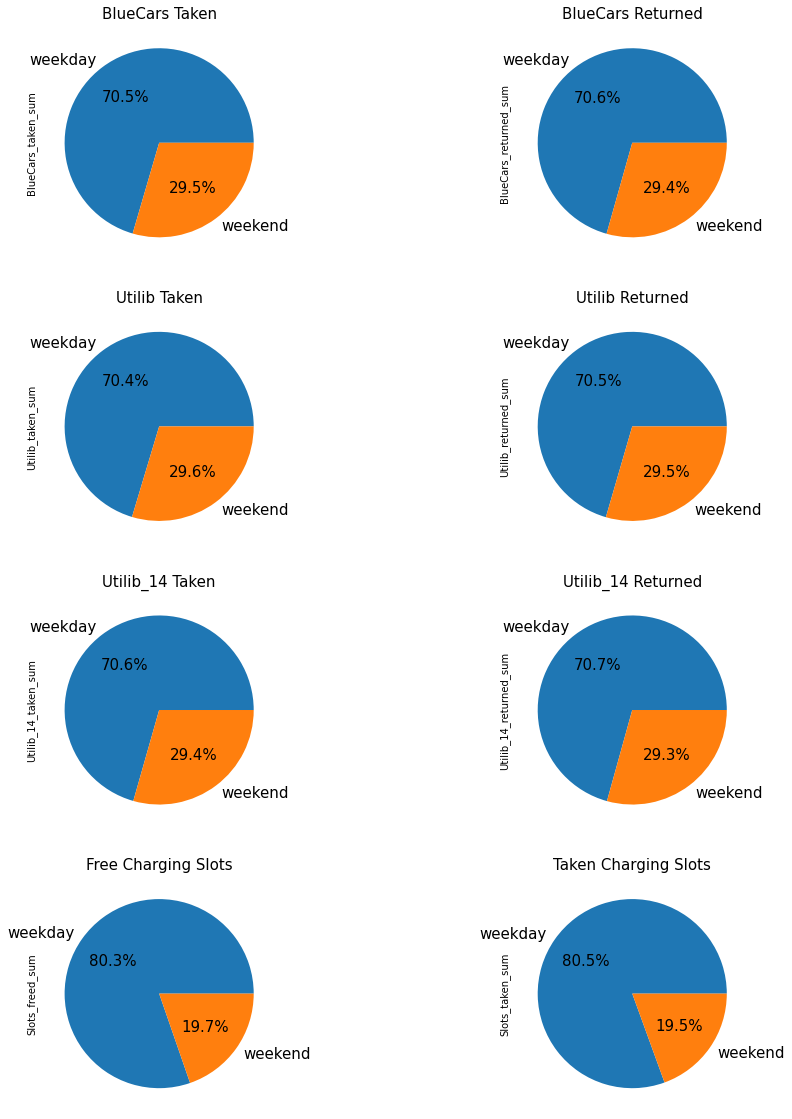

In [ ]:
fig, axarr = plt.subplots(4, 2, figsize=(15, 20))
df.groupby(['Day_type'])['BlueCars_taken_sum'].sum().plot(kind='pie',autopct='%1.1f%%', ax=axarr[0][0],fontsize=15).set_title("BlueCars Taken", fontsize=15)
df.groupby(['Day_type'])['BlueCars_returned_sum'].sum().plot( kind='pie',autopct='%1.1f%%',ax=axarr[0][1], fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
df.groupby(['Day_type'])['Utilib_taken_sum'].sum().plot.pie(autopct='%1.1f%%',ax=axarr[1][0], fontsize=15 ).set_title("Utilib Taken", fontsize=15) 
df.groupby(['Day_type'])['Utilib_returned_sum'].sum().plot( kind='pie',autopct='%1.1f%%',ax=axarr[1][1], fontsize=15 ).set_title("Utilib Returned", fontsize=15) 
df.groupby(['Day_type'])['Utilib_14_taken_sum'].sum().plot( kind='pie',autopct='%1.1f%%',ax=axarr[2][0], fontsize=15 ).set_title("Utilib_14 Taken", fontsize=15) 
df.groupby(['Day_type'])['Utilib_14_returned_sum'].sum().plot( kind='pie',autopct='%1.1f%%',ax=axarr[2][1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
df.groupby(['Day_type'])['Slots_freed_sum'].sum().plot( kind='pie',autopct='%1.1f%%',ax=axarr[3][0], fontsize=15 ).set_title("Free Charging Slots", fontsize=15) 
df.groupby(['Day_type'])['Slots_taken_sum'].sum().plot( kind='pie',autopct='%1.1f%%',ax=axarr[3][1], fontsize=15 ).set_title("Taken Charging Slots", fontsize=15) 



plt.subplots_adjust(wspace=.3) 

**Summary**

As expected, all across the board there is a high amount of Cars being picked and returned to the Stations .

#### 2.2.3.Pair plot and Correlation Matrix

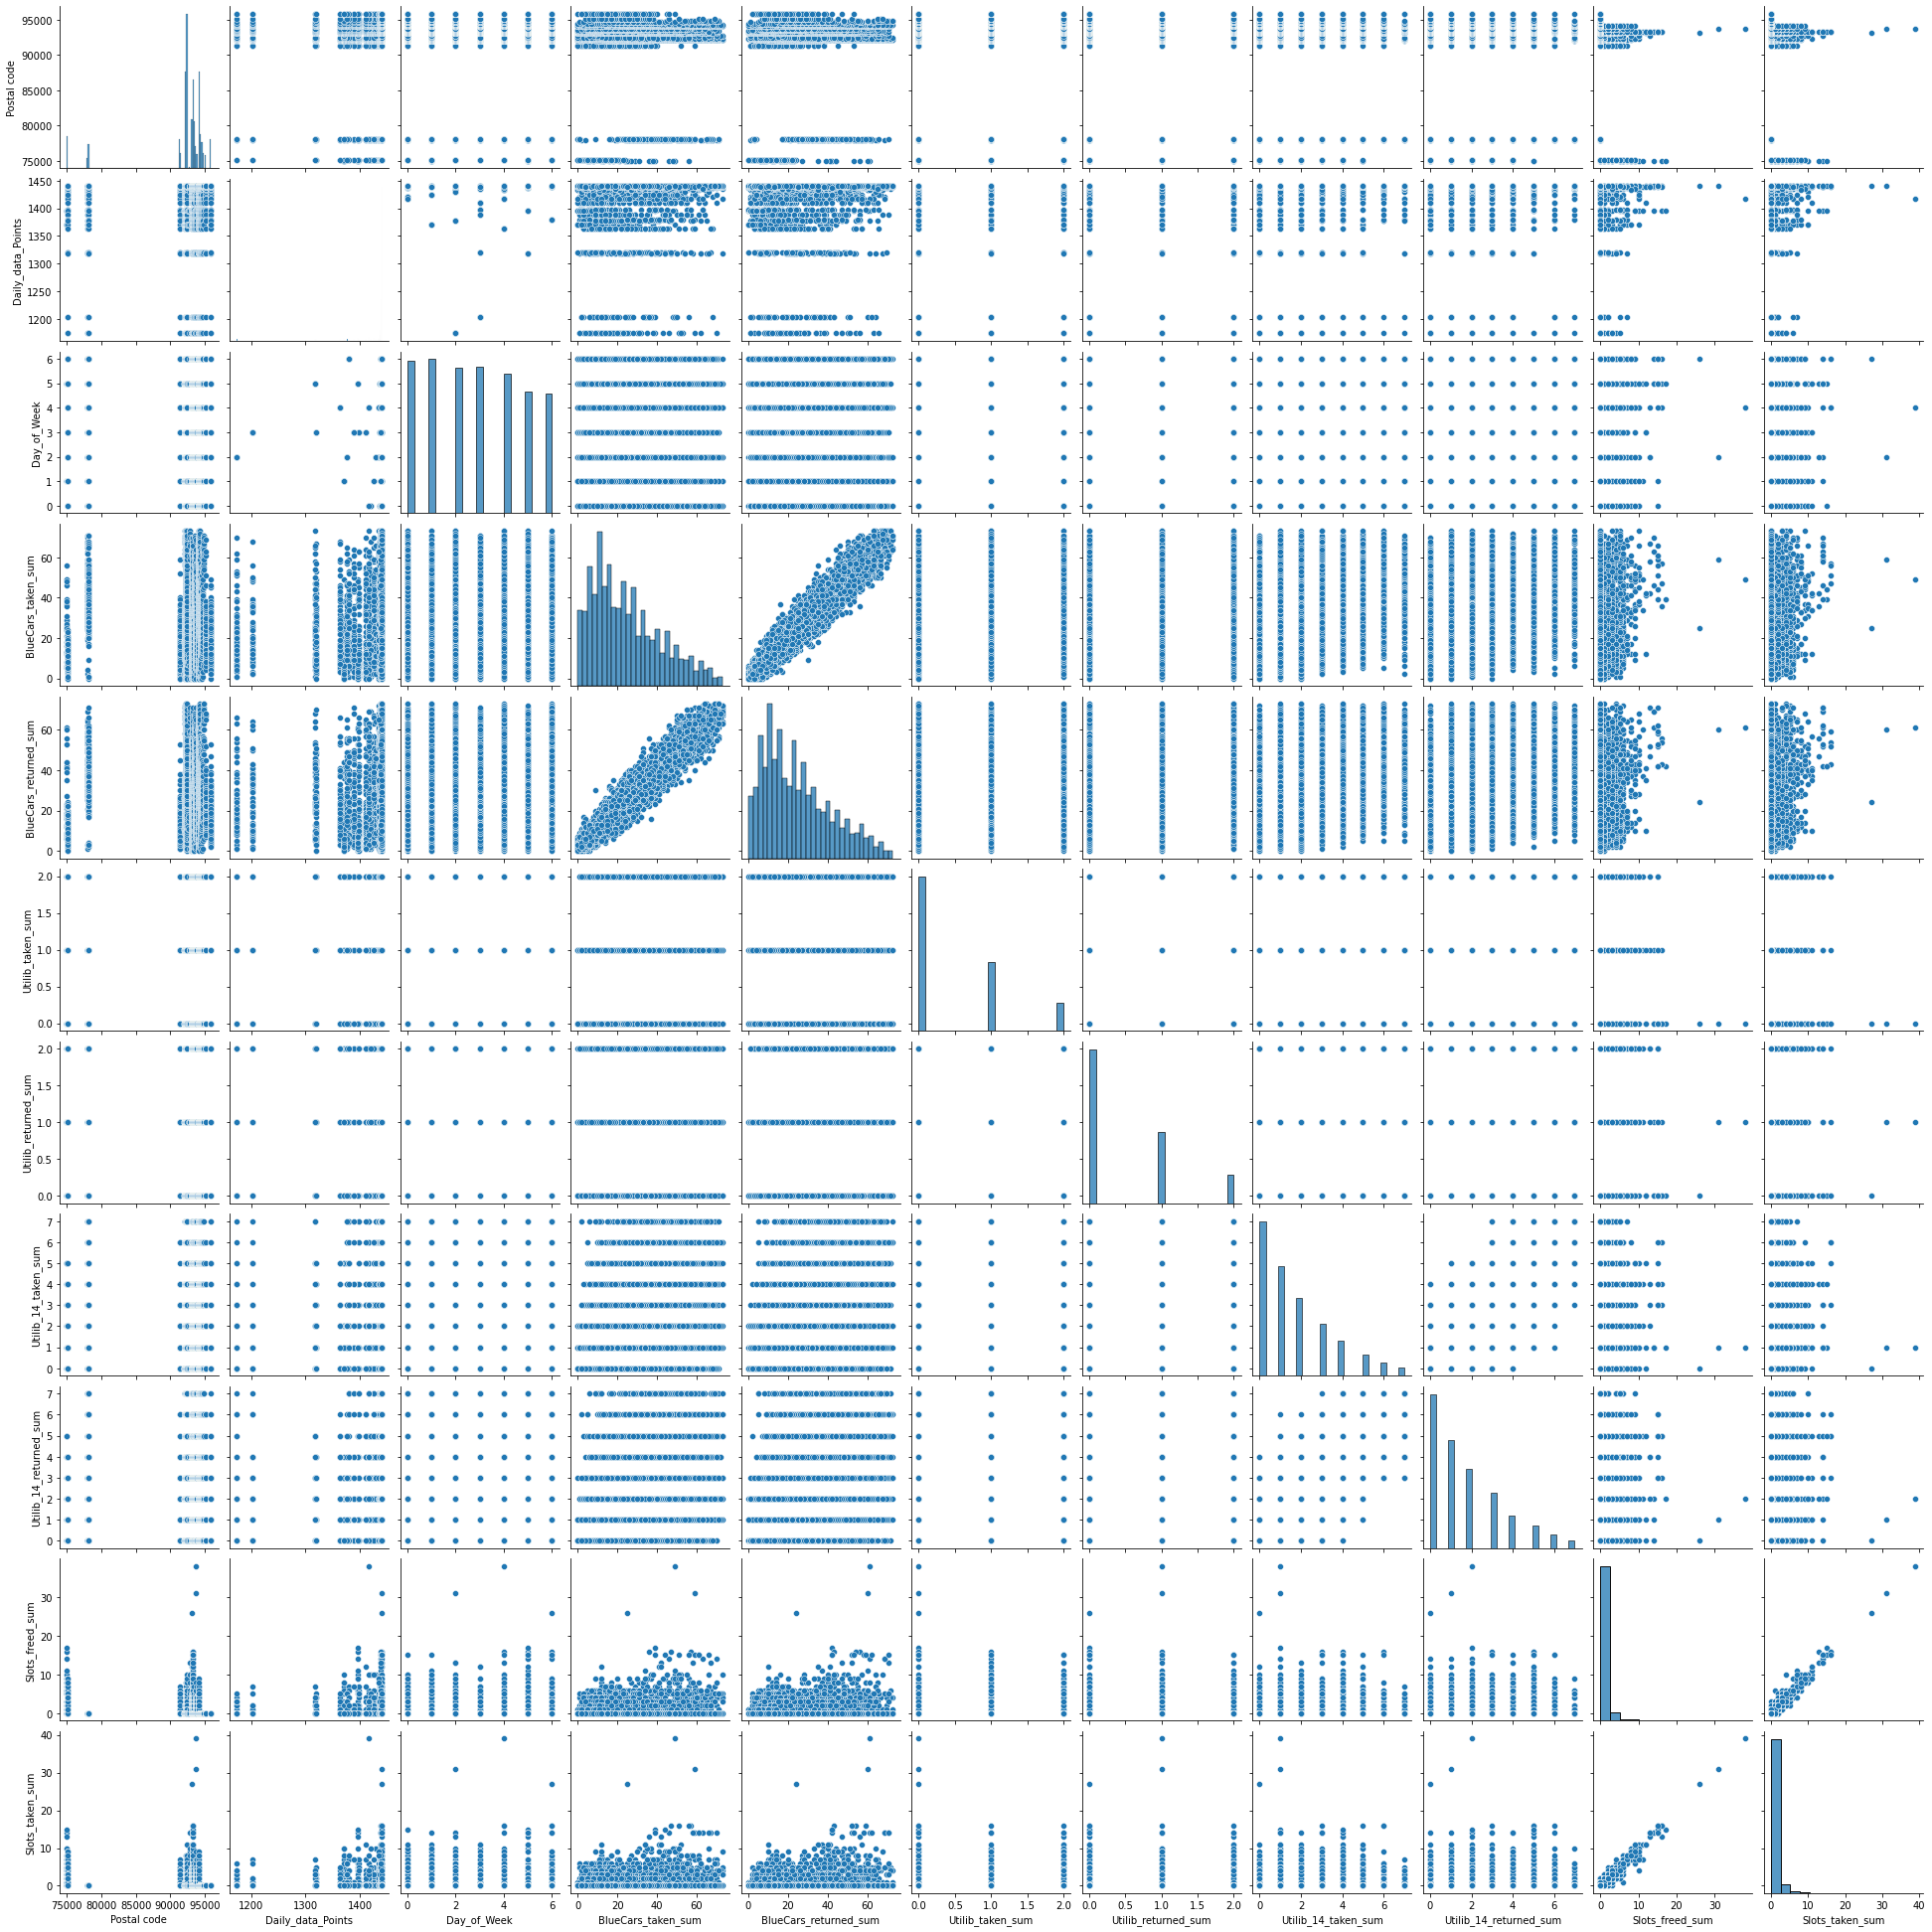

In [ ]:
sns.pairplot(df)

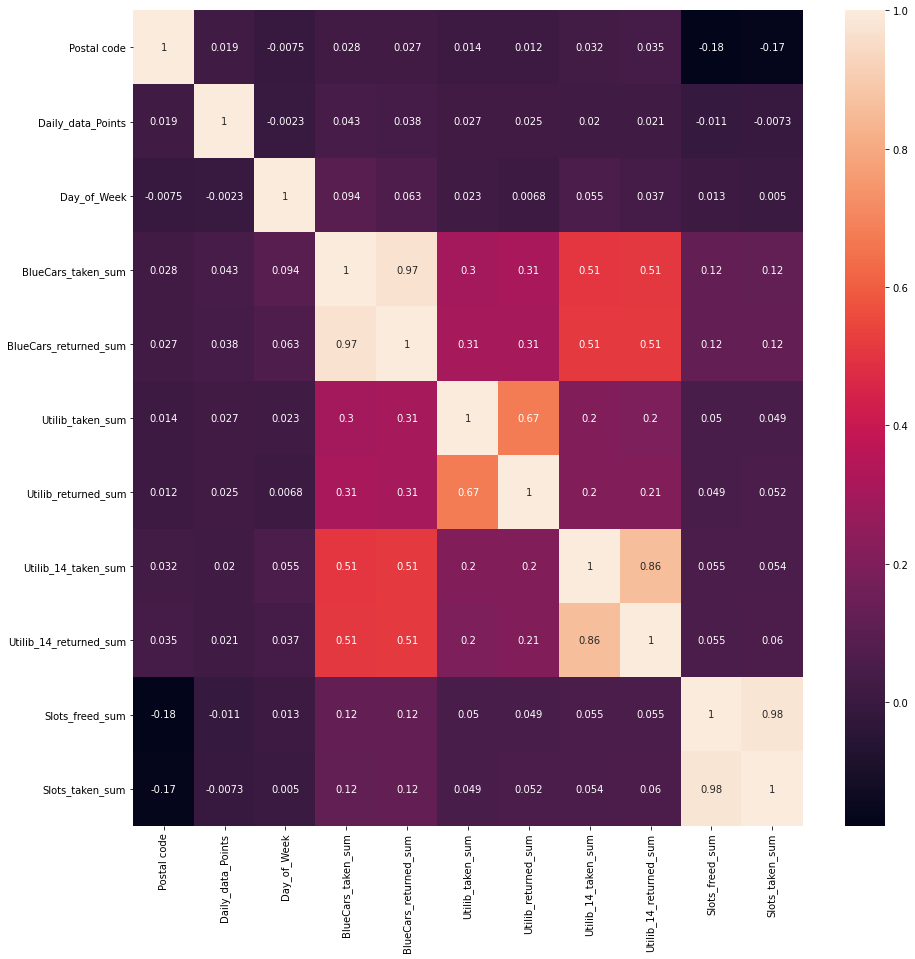

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)



**Correlation Matrix Summary**

There is a strong positive correlation between:
* The BlueCars taken and BlueCar returned Variable
* The Free Charging Slots and the Taken Charging Slots columns.
* The Utilib taken and Utilib returned variable
* The Utilib_14 taken and the Utilib_14 returned 

Furthermore there is weak inverse relationship with the Postal Code and Charging Slots Taken variable and the Postal Code and Charging Slotsd Freed Variable.
The Charging Slots columns have a similar inverse relationship with the  Daily data Points column.

# 3.Hypothesis testing

### 3.1.Hypothesis Testing Procedure.

In this analysis we decide to carry out Hypothesis Testing on the Blue Car variable.

Therefore we will selected a sample from both the BueCar taken and Returned columns , we opt to pick the sample as one specific day.

The Blue Car company would like to investigate the claim that on any given day the Number of blue cars being taken and returned to their stations acrosss the country is equal.


Therefore for them to investigate this claim they pick a random date and decide to carry out a Two Sample T-Test on the mean.

Thus our Hypothesis becomes

Ho: u1 = u2

against 

Ha: u1 != u2


If we then fail to reject the null hypothesis then the Autolib Blue Car Company can conclude that they have enough Blue Cars for their customers to rent out at any given day.

If we reject our hypothesis then the Company has to carry out further Statistical Analysis to determine whether they have fewer cars to rent to their clients on any given day or whether they have surplus cars laying idly in their stations. 


#### 3.1.1.Testing For Normality

Before carrying out any other Test we check for the Normality of the data using the Shapiro Wilk Test.

Ho: The data was drawn from a Normally Distributed Population

Ha: The data was not drawn from a normally distributed population.

At N > 5000 , the p-value of the test may be inaccurate therefore we also opt to carry out the Anderson-Darling Test to improve our results.

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(df.BlueCars_taken_sum)
shapiro_test

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9404326677322388, 0.0)

In [ ]:
stats.anderson(df.BlueCars_taken_sum, dist='norm')

AndersonResult(statistic=140.53154894867475, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

After carrying out the Shapiro Wilk test for Normality we determined that 
* The P-value is < 0.05 we reject the null hypothesis and conclude that the the Data was not drawn from a Normal
Distribution at alpha=0.05 level of significance.

We opted to carry out another test the Anderson-Darling Test and similarly the Test Statistic was 28.75 while the Critical Values were :

 Critical Values       
 * 0.575   at 0.15  Level of Significance               
 * 0.655   at 0.10  Level of Significance                 
 * 0.785   at 0.05  Level of Significance   
 * 0.916   at 0.025 Level of Significance   
 * 1.09    at 0.01  Level of Significance


 We therefore reject the Null hypothesis.

Given that the data is not from a normal distribution the right procedure would be to either normalize the data or carry out Non Parametric tests on the Data.


#### 3.1.2.Selecting a Sample from the Population.

Given that the Data is from the Autolib Blue Cars population we select a sample of one day out of the whole dataset and use this in the test

In [ ]:
df2=df[['BlueCars_taken_sum']][df['Date']=='1/2/2018' ]

df3=df[['BlueCars_returned_sum']][df['Date']=='1/2/2018']



##### 3.1.2.1.Normalizing the Data.

We carried out both the Shapiro Wilk and Anderson-Darling tests above and concluded that the data is not from a normally distributed Population.

Therefore we attempt to normalize the data using the BoxCox transformation in order for us to carry out T-test.

BoxCox Transformation.

We import the Boxcox function from the Scipy stats package and then use this to transform out non-normal data into a normal distribution.

For the Bluecars taken Variable

In [ ]:
from scipy.special import boxcox1p
df2.BlueCars_taken_sum = boxcox1p(df2.BlueCars_taken_sum,0.25)

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(df2.BlueCars_taken_sum)
shapiro_test

(0.9840507507324219, 0.6208546757698059)

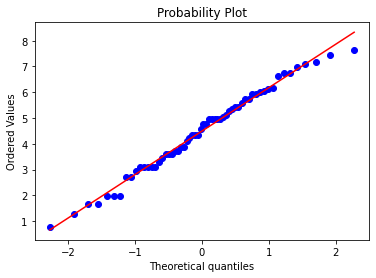

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
probplot(df2.BlueCars_taken_sum, plot = plt)
plt.show()

For the BlueCars returned Variable.

In [ ]:
from scipy.special import boxcox1p
df3.BlueCars_returned_sum = boxcox1p(df3.BlueCars_returned_sum,0.25)


In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(df3.BlueCars_returned_sum)
shapiro_test

(0.9814286231994629, 0.4918783903121948)

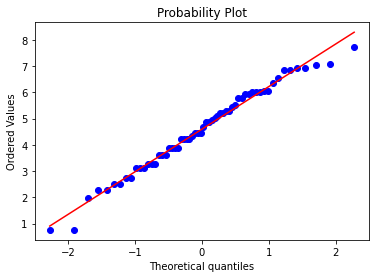

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
probplot(df3.BlueCars_returned_sum, plot = plt)
plt.show()

#### 3.1.3 Carrying out a  Two Sample T-Test

We import the ttest for independent samples from the Scipy package and carry out the Ttest.

Our degrees of freedom are n1+n2-2 which here becomes , 60+60-2=118

In the statistical tables as seen here [Statistical Tables](https://www.medcalc.org/manual/t-distribution.php) at 118 degrees of freedom the tabulated T-statistic is approximately 1.980

In [ ]:
a= np.array(df2)
b = np.array(df3)

In [ ]:
df3.describe() ,df2.describe()

(       BlueCars_returned_sum
 count              60.000000
 mean                4.598329
 std                 1.599526
 min                 0.756828
 25%                 3.517647
 50%                 4.560959
 75%                 5.931295
 max                 7.731888,        BlueCars_taken_sum
 count           60.000000
 mean             2.065112
 std              0.503525
 min              0.605135
 25%              1.740291
 50%              2.169871
 75%              2.442446
 max              2.860198)

In [ ]:
from scipy.stats import norm
import scipy.stats
TestStat = scipy.stats.ttest_ind(a, b, axis=0, equal_var=True)
TestStat

Ttest_indResult(statistic=array([-0.35374093]), pvalue=array([0.7241643]))

Carrying out the Test we establish that:

T-Statistic = -0.35 and the P-Value is 0.72

Therefore since the calculated statistic(-0.35) is less than our tabulated value(1.98) we **Fail to reject the Null Hypothesis** and conclude that there are an equal number of Blue cars being taken and returned to Stations on a given day at alpha = 0.05 level of significance.

#### 3.1.4.Construction a Confidence Interval

We then construct a confidence interval for the Data at aplha 0.05 level of Significance.

We are 95% confident that the mean number of BlueCars being taken and returned to the stations on a given day is between
[-0.69 , 0.48]

In [ ]:
x1 = a
x2 = b

alpha = 0.05                                                 
n1, n2 = len(x1), len(x2)                                    
s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)              
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
df = n1 + n2 - 2                                             
t = stats.t.ppf(1 - alpha/2, df)                             

lower = (np.mean(x1) - np.mean(x2)) - t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s
upper = (np.mean(x1) - np.mean(x2)) + t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s
(lower,upper)

(-0.6939067425729573, 0.4835709850600616)

#### 3.1.5.Power of the Test

Using the Statsmodels package we imported the Power solver function and calculated the power of the test.


Interestingly this function can also be used to calculate the sdample size when all other parameters in the function are satisfied.

In [176]:
#!pip install statsmodels
from statsmodels.stats.power import tt_ind_solve_power
statsmodels.stats.power.tt_ind_solve_power(effect_size=0.75, nobs1=60, alpha=0.05, power=None, ratio=1, alternative='two-sided')

0.9827552322903581

**SUMMARY**


After carrying out hypothesis testing we have concluded that the mean number of BlueCars within the Station either being returned or rented out have approximately the same mean at alpha 0.05 level of significance.

The power of the test here was estimated to be 0.98 at alpha 0.05 level of significence.
Therefore the probability of rejecting the null hypothesis when it is indeed false i.e the probability of avoiding a type 2 error is given as 0.98 or 98%.


However these results should be subject to further scrutiny given the abnormal nature of the initial dataset and the high number of  outliers within the Dataset.


Furthermore the assumption of normality within this dataset was violated and therefore perhaps a better way of carrying out the Hypothesis testing would be by use of Non-Parametric procedure such as the Man-Whitney U which tests whether two independent samples were drawn from a population with the same distribuion.